Crie um programa que simule uma máquina de vendas (de refrigerante, salgadinhos, etc.). 

A máquina possui diversos “slots”, cada um capaz de receber um tipo de moeda diferente: 1, 5, 10 centavos, etc.

A máquina deve receber moedas e delegar aos slots que as capturem. 

Quando chegar ao valor do produto a máquina deve entregar o produto e informar o troco.

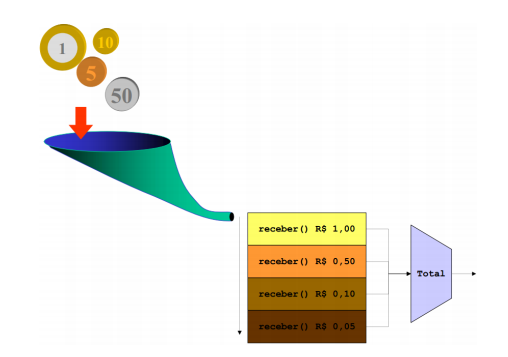

In [ ]:
#Import do modulo que prove a estrutura de definição de classes abastratas no py
from abc import ABC, abstractmethod
from typing import Optional

In [ ]:
#Classe que define a máquina de vendas
class salesMachine:
  def __init__(self):
    #Definição dos produtos, e seus respectivos preços
    self.Sanduiche = 3.00
    self.Salgadinho = 2.50
    self.Refri = 1.00
    self.Suco = 1.00

    #Definição do produto escolhido pelo cli, saldo 
    self.prod = 0
    self.coins = 0
    self.pb = None

  #Método responsável por atualizar o produto escolhido
  def setProd(self, pd: int):
    self.pd = pd

    print("Produto:")

    if self.pd == 0:
      self.prod = self.Sanduiche
      print("Sanduiche - Valor:",self.prod)
    elif self.pd == 1:
      self.prod = self.Salgadinho
      print("Salgadinho - Valor:",self.prod)
    elif self.pd == 2:
      self.prod = self.Refri
      print("Refri - Valor:",self.prod)
    elif self.pd == 3:
      self.prod = self.Suco
      print("Suco - Valor:",self.prod)
    else:
      print("Nenhum produto válido selecionado")

  #Método responsável pela atualização do saldo do cliente
  def newCoin(self, coin: int):
    self.coins += coin

    print("Saldo atual:", self.coins)
    #print("Minimo necessário:", self.prod)

    if (self.coins >= self.prod):
      self.pb = (self.coins - self.prod)
      
  #Método que verifica se o produto deve ser liberado ou não 
  def getstatus(self):
    if self.pb is not None:

      self.tmp_pb = self.pb
      self.pb = None
      self.coins = 0

      return self.tmp_pb

In [ ]:
#Classe que define os slots
class Slots(ABC):
    def __init__(self, successor):      
      self.successor = successor

    #Definição do método handle, responsável por percorrer a chain
    def handle(self, request: int, maq: salesMachine):
      self.request = request
      self.maq = maq

      self.res = self.process_coin(self.request,self.maq)

      if not self.res and self.successor:
        self.successor.handle(self.request,self.maq)

    #Método que define o processamento das moedas    
    @abstractmethod
    def process_coin(self, coin: int, Ms: salesMachine) -> Optional[bool]:
      pass

In [ ]:
class Fivec(Slots):
    def __init__(self, machine):
      self.machine = machine      
      
    def process_coin(self, coin: int, Ms: salesMachine) -> Optional[bool]:
      if coin == 0.05:
        #print(f"Moeda de {coin}¢, handler FivecHandler")
        Ms.newCoin(coin)
        return True

In [ ]:
class Tenc(Slots):
    def __init__(self, machine):
      self.machine = machine      
      
    def process_coin(self, coin: int, Ms: salesMachine) -> Optional[bool]:
      if coin == 0.10:
        #print(f"Moeda de {coin}¢, handler TencHandler")
        Ms.newCoin(coin)
        return True     

In [ ]:
class Fiftyc(Slots):
    def __init__(self, machine):
      self.machine = machine      
      
    def process_coin(self, coin: int, Ms: salesMachine) -> Optional[bool]:
      if coin == 0.50:
        #print(f"Moeda de {coin}¢, handler FiftycHandler")
        Ms.newCoin(coin)
        return True   

In [ ]:
class Onec(Slots):
    def __init__(self, machine):
      self.machine = machine      
      
    def process_coin(self, coin: int, Ms: salesMachine) -> Optional[bool]:
      if coin == 1.00:
        #print(f"Moeda de {coin}¢, handler OnehundredcHandler")
        Ms.newCoin(coin)
        return True  

In [ ]:
class Notrecognized(Slots):
    def __init__(self, machine):
      self.machine = machine    

    def process_coin(self, coin: int, Ms: salesMachine) -> Optional[bool]:
      print(f"Moeda {coin} não reconhecida!")
      return False

In [ ]:
if __name__ == "__main__":
    
    #Criação do objeto máquina de vendas
    SM = salesMachine()

    #Definição dos handlers
    h0 = Fivec(SM)
    h1 = Tenc(SM)
    h2 = Fiftyc(SM)
    h3 = Onec(SM)
    h4 = Notrecognized(SM)

    #Definição dos sucessores
    h0.successor = h1
    h1.successor = h2
    h2.successor = h3
    h3.successor = h4
    h4.successor = None #Final da chain
    
    #Variáveis temporárias 
    coin = 0
    ret = None 
    prod = 0

    while True:
      print("\n\n##### Máquina de Vendas ######")
      print("--- PRODUTOS DISPONIVEIS ---")
      print(" 0 - Sanduiche (3.00) \n 1 - Salgadinho (2.50) \n 2 - Refri (1.00) \n 3 - Suco (1.00)")
      print(" 9 - Para cancelar")
         
      prod = int(input("Digite uma opção:"))
    
      #Caso o cliente queira cancelar a venda
      if prod == 9:
        break 

      #Verificação da validade da opção escolhida
      elif prod not in [0,1,2,3]:
        print("Produto inválido")

      else:
        #Caso a opção seja válida
        SM.setProd(prod)

        #Enquanto o retorno do status seja igual a "nada"
        while ret is None:
          #Requisita a inserção da moeda
          coin = float(input("Insira a moeda:"))

          #Percorrer os handle's até encontrar o correto
          h0.handle(coin, SM)
          
          #Retorno do status da venda
          ret = SM.getstatus()

        #Ao finalizar a venda, é retornado o troco
        print("\n\n##### Produto Liberado ######\n\tTroco:{:.2f}".format(ret))

        ret = None

print("\n\nExecução finalizada!")



##### Máquina de Vendas ######
--- PRODUTOS DISPONIVEIS ---
 0 - Sanduiche (3.00) 
 1 - Salgadinho (2.50) 
 2 - Refri (1.00) 
 3 - Suco (1.00)
 9 - Para cancelar
Digite uma opção:0
Produto:
Sanduiche - Valor: 3.0
Insira a moeda:1
Saldo atual: 1.0
Insira a moeda:0.5
Saldo atual: 1.5
Insira a moeda:1
Saldo atual: 2.5
Insira a moeda:1
Saldo atual: 3.5


##### Produto Liberado ######
	Troco:0.50


##### Máquina de Vendas ######
--- PRODUTOS DISPONIVEIS ---
 0 - Sanduiche (3.00) 
 1 - Salgadinho (2.50) 
 2 - Refri (1.00) 
 3 - Suco (1.00)
 9 - Para cancelar
Digite uma opção:2
Produto:
Refri - Valor: 1.0
Insira a moeda:1
Saldo atual: 1.0


##### Produto Liberado ######
	Troco:0.00


##### Máquina de Vendas ######
--- PRODUTOS DISPONIVEIS ---
 0 - Sanduiche (3.00) 
 1 - Salgadinho (2.50) 
 2 - Refri (1.00) 
 3 - Suco (1.00)
 9 - Para cancelar
Digite uma opção:1
Produto:
Salgadinho - Valor: 2.5
Insira a moeda:9
Moeda 9.0 não reconhecida!
